## 서론
- ai, 데이터마이닝의 기본은 데이터 수집이다. 데이터를 획득하기 좋은환경이 아니라면 직접 내용들을 긁어와야 할 필요가 있다.
- 동적,정적 크롤링 라이브러리를 적절히 활용하여 실제 웹 사이트상의 데이터를 긁어와 데이터프레임에 저장하여 시각화 하기로 한다.
- 주 사용 라이브러리 : selenium, beatifulsoup
- 분석 대상 사이트 : kream 

## 설치 및 임포트 

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time, os
from datetime import datetime
import pandas as pd
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

- 크롤링을 코랩에서 진행하는 경우, 실제 드라이버가 웹 상에서 어떻게 동작하는지 볼 수 없다.
  - 드라이버 옵션을 조정하여 에러가 나지 않도록 조치 해주어야 한다
- 동작 과정 및 에러 상황을 직접 눈으로 확인할 수 있어서 웬만하면 vscode 등 다른 환경에서 작업하는 게 좋다  

## 사이트 접속 

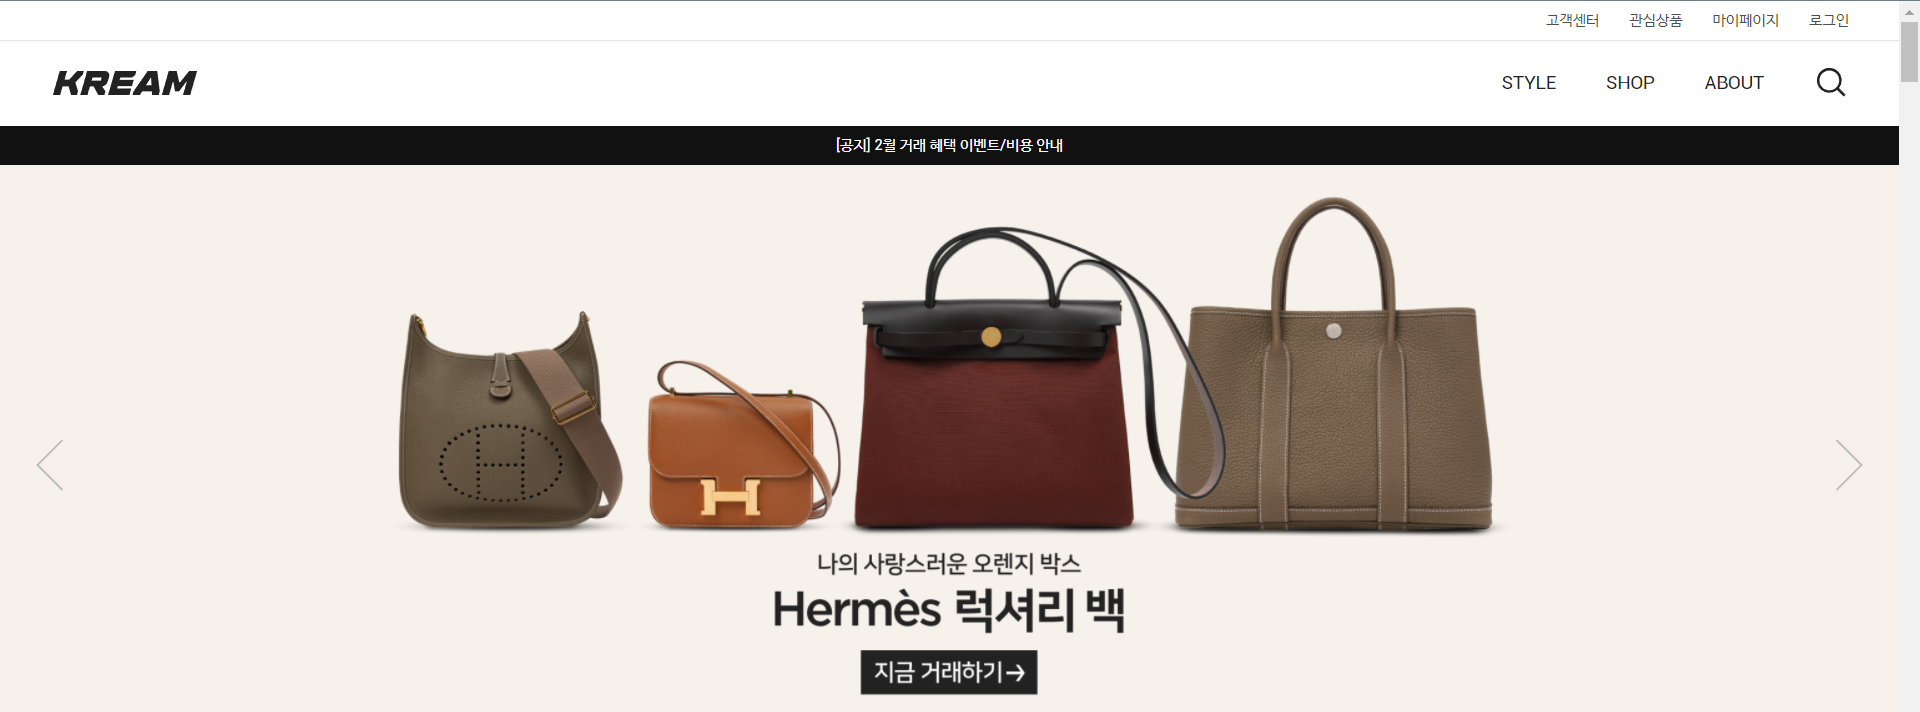

In [ ]:
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

link_kream = "https://kream.co.kr/" # 분석대상 사이트
df = pd.DataFrame(columns=['사이즈', '거래가', '거래일']) # 추후 데이터를 담을 데이터프레임 생성


driver.get(link_kream)
time.sleep(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


- 새로운 화면으로 이동할 때에는 .sleep() 을 중간중간 배치함으로써 오류를 방지한다 

## 로그인 

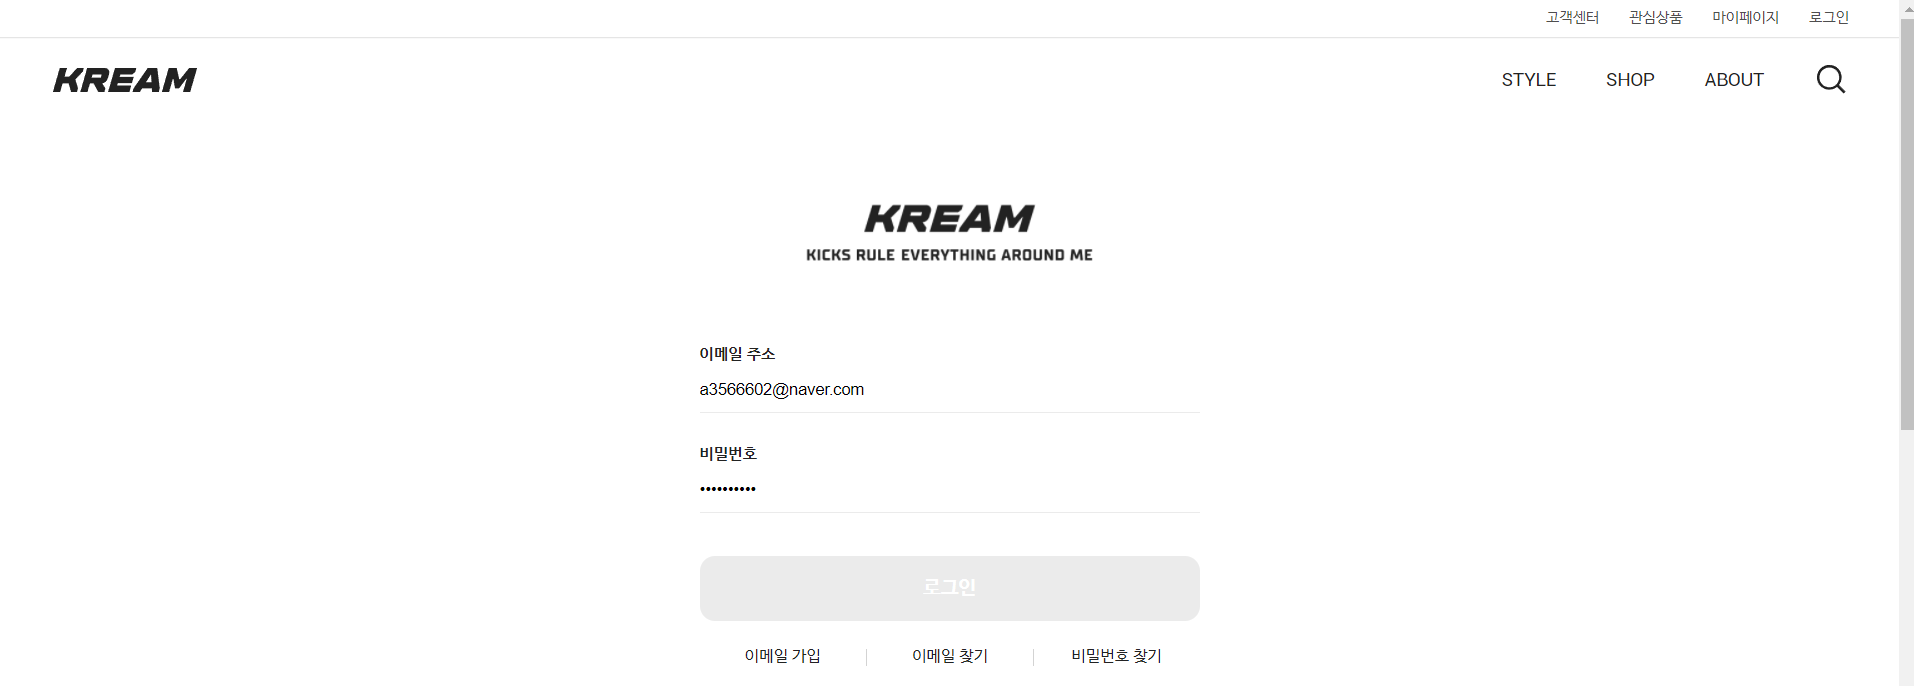

In [ ]:
login_bar = driver.find_element_by_xpath('/html/body/div/div/div/div[1]/div[1]/div/ul/li[4]/a') 
login_bar.click()
time.sleep(2)

id = driver.find_element_by_xpath('/html/body/div/div/div/div[2]/div[1]/div/div[1]/div/input')
id.send_keys('a3566602@naver.com')
password = driver.find_element_by_xpath('/html/body/div/div/div/div[2]/div[1]/div/div[2]/div/input')
password.send_keys('y18122606!')
login = driver.find_element_by_xpath('/html/body/div/div/div/div[2]/div[1]/div/div[3]/a[1]')
login.click() 
time.sleep(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  if __name__ == '__main__':


## 인기 모델 목록 수집하기 

- 인기 상품 카테고리 중 신발 카테고리를 선택해야한다
- 보다 많은 정보를 얻기위해 '더보기'를 클릭한다

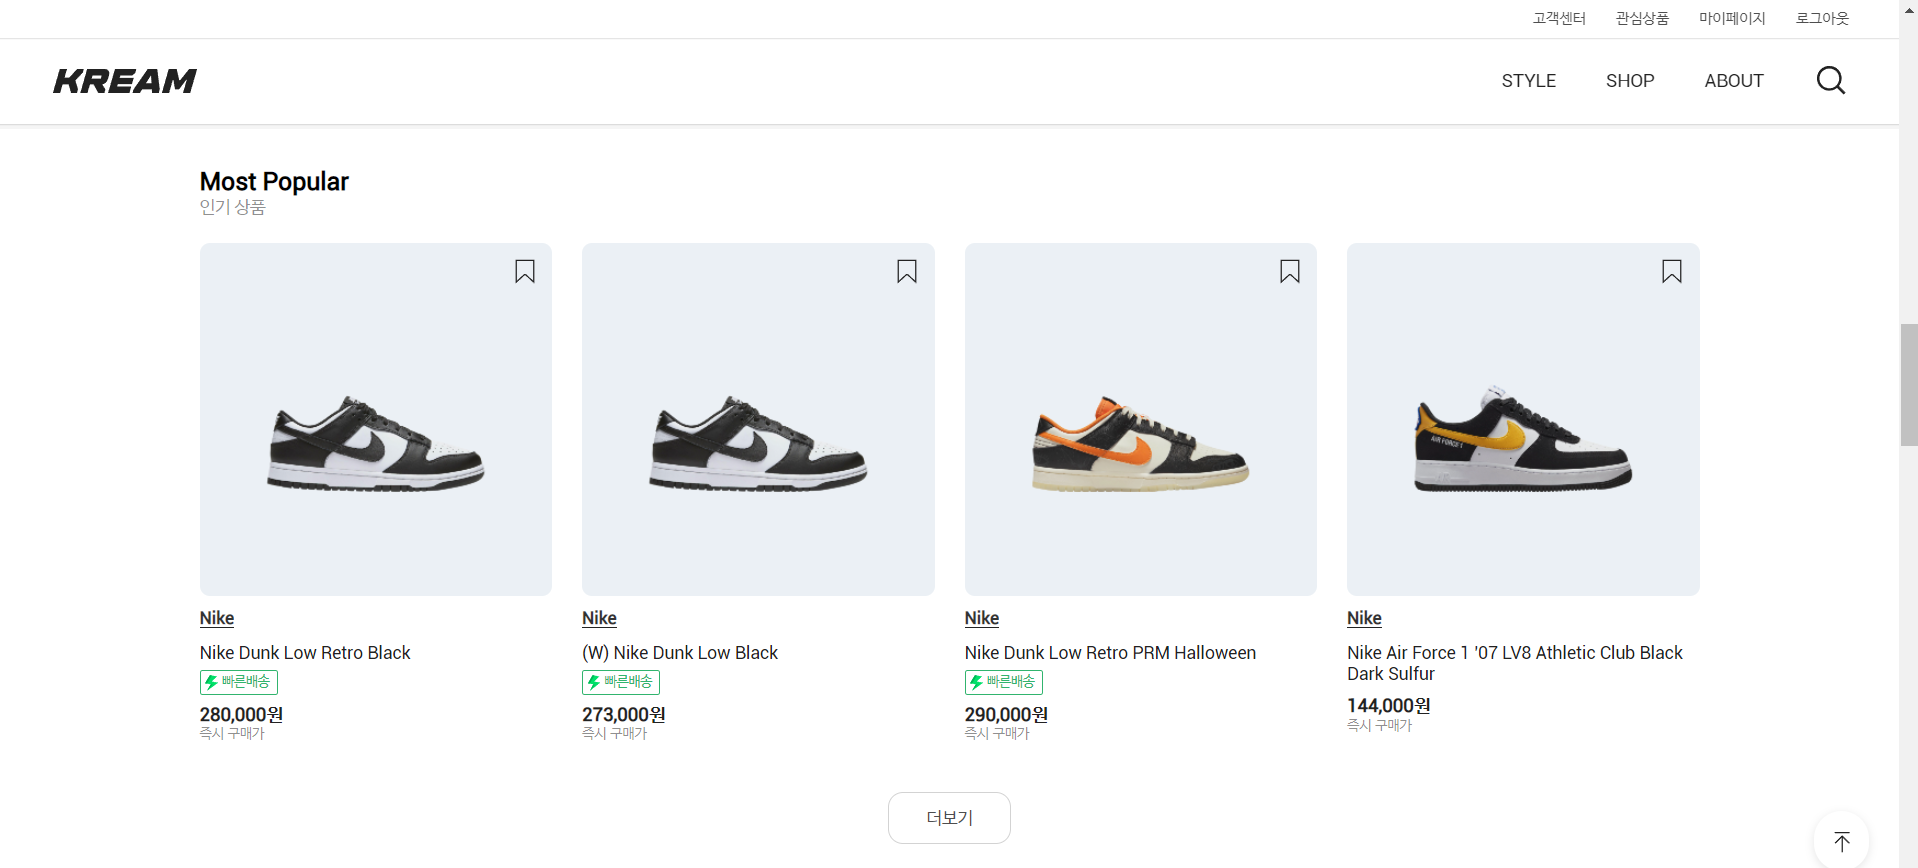

In [ ]:
from selenium.webdriver import ActionChains

# 마지막 상품 위치를 final_tag, 이게 발견될때까지 스크롤
final_tag = driver.find_element_by_xpath('/html/body/div/div/div/div[2]/div[1]/div[2]/div[6]/div[2]/div[2]/a')
action = ActionChains(driver)
action.move_to_element(final_tag).perform()

final_tag.click()
time.sleep(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  after removing the cwd from sys.path.


In [ ]:
modelNames = []
lists = driver.find_elements_by_class_name('info_box')[5:13] # 여러개인 경우 이렇게 인덱싱하는게 정말 꿀팁

for list in lists:
    # bs4를 이용해서 html요소 작업을 하려면 먼저 이렇게 해줘야함 -> 파싱자체는 bs4가 더 빨라서 섞어써준다
    # 이거 bs4안쓰고 selenium으로하면 똑같은거로만 뜸! 무조건 bs4로 하기
    soup = BeautifulSoup(list.get_attribute('innerHTML'), 'html.parser')

    name = soup.find(class_='name').text
    modelNames.append(name) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  


## 인기모델들 하나씩을 대상으로 본격적인 크롤링 시작  

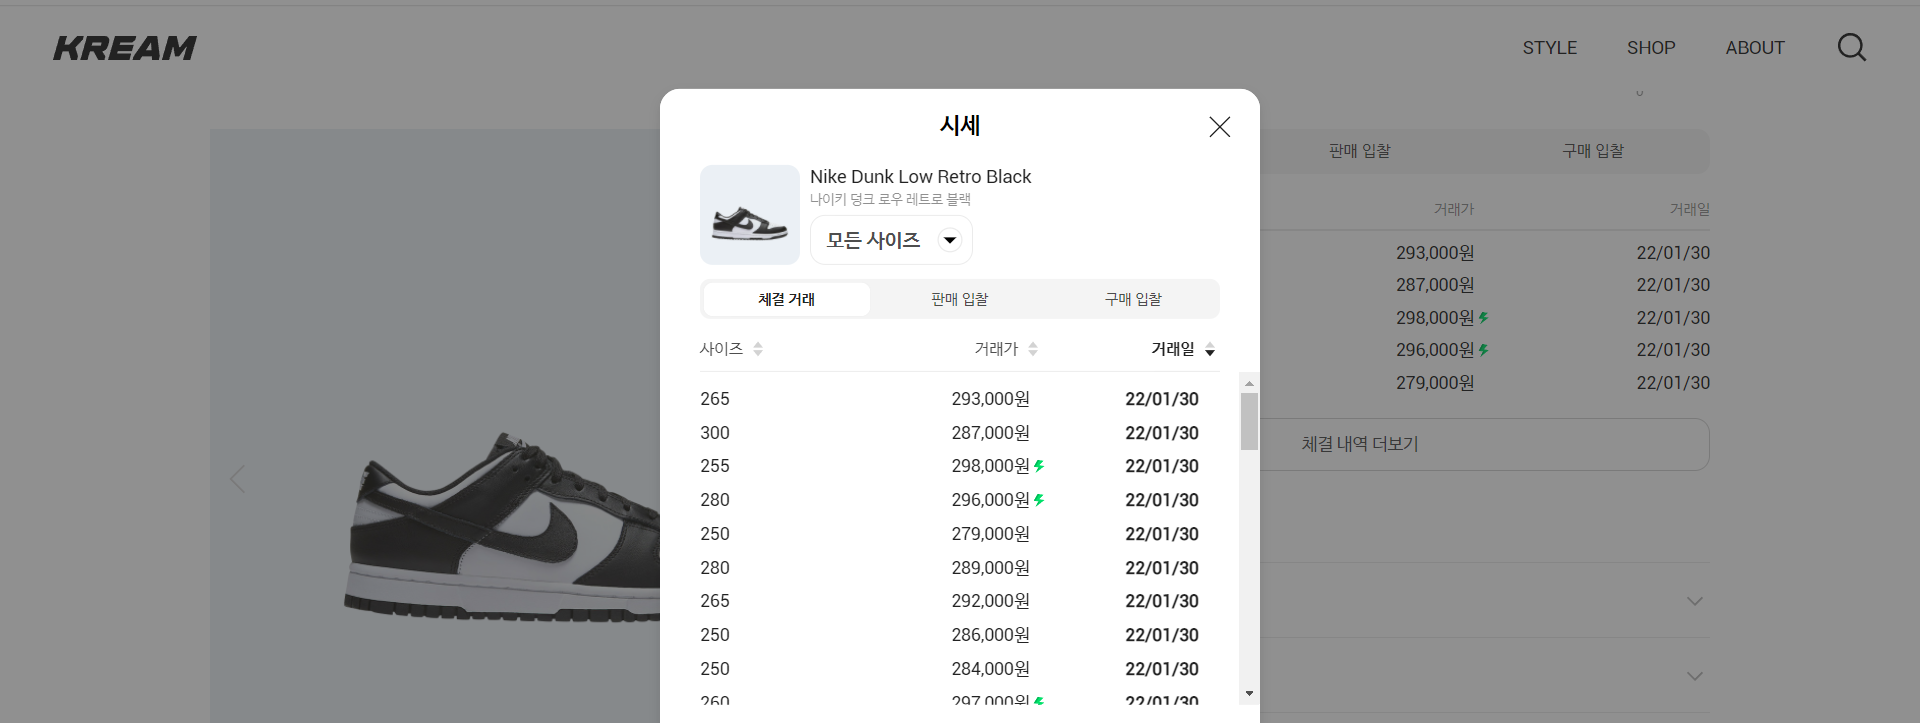

1. 검색창에 인기모델 목록들을 하나씩 검색하여, 상세정보로 들어간다
2. 정보들 중 체결 내역 더보기를 클릭한다
3. 스크롤을 내려가며 사이즈, 거래가, 거래일을 모델별로 수집하여 데이터프레임에 저장한다
4. 위 과정을 모델별로 각각 수행한다

In [ ]:
for modelName in modelNames :

    search_bar = driver.find_element_by_xpath('/html/body/div/div/div/div[1]/div[2]/div/div[1]/div')
    time.sleep(3)
    search_bar.click()
    time.sleep(3)

    search = driver.find_element_by_xpath('/html/body/div/div/div/div[1]/div[2]/div/div[5]/div/div/div[2]/div[1]/div/div/div/input')
    time.sleep(3)
    search.send_keys(modelName)
    time.sleep(5)

    e = driver.find_element_by_xpath('/html/body/div/div/div/div[1]/div[2]/div/div[5]/div/div/div[2]/div[2]/div[2]/div/div[2]/div[1]/a')
    e.click()
    time.sleep(3)

    more_informations = driver.find_element_by_xpath('/html/body/div/div/div/div[2]/div[1]/div/div[2]/div/div[5]/div[1]/div[3]/div/div[1]/a')
    more_informations.click()
    time.sleep(2)
    e = driver.find_element_by_xpath('/html/body/div/div/div/div[2]/div[1]/div/div[2]/div/div[6]/div/div[2]/div[2]/div/div[1]/div/div/div[2]')
    e.click()
    modelName = driver.find_element_by_class_name('model_ko').text

    # ActionChains 를 사용하기 위해서.
    from selenium.webdriver import ActionChains

    # 마지막 상품 위치를 final_tag, 이게 발견될때까지 스크롤
    final_tag = driver.find_elements_by_class_name('body_list')[-1] 
    action = ActionChains(driver)
    action.move_to_element(final_tag).perform()

    # informations = driver.find_elements_by_css_selector('.body_list')
    informations = driver.find_elements_by_xpath('//div[@class="price_body"]//div[@class="body_list"]')
    print('%d개의 거래 내역들을 불러 올 수 있습니다' % len(informations)) # 몇개의 거래내역을 긁어올 수 있는지 : 50개라고 뜨네.. html로 보면 100개인데


    # get information data
    for information in informations:
        # bs4를 이용해서 html요소 작업을 하려면 먼저 이렇게 해줘야함 -> 파싱자체는 bs4가 더 빨라서 섞어써준다
        # 이거 bs4안쓰고 selenium으로하면 똑같은거로만 뜸! 무조건 bs4로 하기
        soup = BeautifulSoup(information.get_attribute('innerHTML'), 'html.parser')

        size = soup.find_all(class_='list_txt')[0].text 
        price = (soup.find_all(class_='list_txt')[1].text)#[:9] 
        date = soup.find_all(class_='list_txt')[2].text 
        
        # append to dataframe
        df = df.append({
            '모델명': modelName,
            '사이즈': size,
            '거래가': price,
            '거래일': date,
        }, ignore_index=True)

    time.sleep(3)
    driver.get(link_kream)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: find

50개의 거래 내역들을 불러 올 수 있습니다
50개의 거래 내역들을 불러 올 수 있습니다
50개의 거래 내역들을 불러 올 수 있습니다
50개의 거래 내역들을 불러 올 수 있습니다
50개의 거래 내역들을 불러 올 수 있습니다
50개의 거래 내역들을 불러 올 수 있습니다
50개의 거래 내역들을 불러 올 수 있습니다
100개의 거래 내역들을 불러 올 수 있습니다


In [ ]:
filename = "result.csv"
df.to_csv(filename, encoding='utf-8-sig', index=False)
print(df)
driver.stop_client()
driver.close()

       사이즈         거래가         거래일                                 모델명
0     245    290,000원    22/01/29                     (W) 나이키 덩크 로우 블랙
1     250    287,000원    22/01/29                     (W) 나이키 덩크 로우 블랙
2     235    300,000원    22/01/29                     (W) 나이키 덩크 로우 블랙
3     250    286,000원    22/01/29                     (W) 나이키 덩크 로우 블랙
4     275    350,000원    22/01/29                     (W) 나이키 덩크 로우 블랙
..     ...         ...         ...                                 ...
445   235    210,000원    22/01/29   (W) 나이키 덩크 로우 디스럽트 2 팬텀 앤 유니버시티 블루
446   230    199,000원    22/01/29   (W) 나이키 덩크 로우 디스럽트 2 팬텀 앤 유니버시티 블루
447   240    205,000원    22/01/29   (W) 나이키 덩크 로우 디스럽트 2 팬텀 앤 유니버시티 블루
448   225    215,000원    22/01/29   (W) 나이키 덩크 로우 디스럽트 2 팬텀 앤 유니버시티 블루
449   245    200,000원    22/01/29   (W) 나이키 덩크 로우 디스럽트 2 팬텀 앤 유니버시티 블루

[450 rows x 4 columns]


## 데이터프레임 분석하기 

In [ ]:
df = pd.read_csv('result.csv')
df.head()

,사이즈,거래가,거래일,모델명
0,245,"290,000원",22/01/29,(W) 나이키 덩크 로우 블랙
1,250,"287,000원",22/01/29,(W) 나이키 덩크 로우 블랙
2,235,"300,000원",22/01/29,(W) 나이키 덩크 로우 블랙
3,250,"286,000원",22/01/29,(W) 나이키 덩크 로우 블랙
4,275,"350,000원",22/01/29,(W) 나이키 덩크 로우 블랙


In [ ]:
df["거래가"] = df["거래가"].str.replace(" ", "") # 공백제거는 strip 말고 꼭 항상 이 방법을 이용할 것!!!! # 시각화 하기전 수치형으로 다 바꿔야함
df.head()

,사이즈,거래가,거래일,모델명
0,245,"290,000원",22/01/29,(W) 나이키 덩크 로우 블랙
1,250,"287,000원",22/01/29,(W) 나이키 덩크 로우 블랙
2,235,"300,000원",22/01/29,(W) 나이키 덩크 로우 블랙
3,250,"286,000원",22/01/29,(W) 나이키 덩크 로우 블랙
4,275,"350,000원",22/01/29,(W) 나이키 덩크 로우 블랙


In [ ]:
df['모델명'].unique()

array(['(W) 나이키 덩크 로우 블랙', '(W) 나이키 덩크 로우 디스럽트 2 팬텀 앤 유니버시티 블루',
       "나이키 에어포스 1 '07 LV8 애슬레틱 클럽 블랙 다크 설퍼",
       '조던 1 미드 라이트 스모크 그레이 앤트러사이트', '나이키 덩크 로우 레트로 블랙',
       "나이키 에어포스 1 '07 로우 화이트",
       '조던 1 x 트래비스 스캇 x 프라그먼트 레트로 로우 OG SP 밀리터리 블루'], dtype=object)

In [ ]:
df_scott = df[(df.모델명 == '조던 1 x 트래비스 스캇 x 프라그먼트 레트로 로우 OG SP 밀리터리 블루')]
df_scott['거래가'].head()

300        1,980,000원
301        1,980,000원
302        1,980,000원
303    1,699,000원빠른배송
304    1,938,000원빠른배송
Name: 거래가, dtype: object

In [ ]:
def change(data) :
  if len(data) == 10 :
    data = data[:1] + data[2:5] + data[6:9]
  elif len(data) == 14 :
    data = data[:10]
    data = data[:1] + data[2:5] + data[6:9]
  else : 
    data = data[:7]
    data = data[:3] + data[4:]
  return data

df['거래가'] = df['거래가'].apply(change)
df.head() 

,사이즈,거래가,거래일,모델명
0,245,290000,22/01/29,(W) 나이키 덩크 로우 블랙
1,250,287000,22/01/29,(W) 나이키 덩크 로우 블랙
2,235,300000,22/01/29,(W) 나이키 덩크 로우 블랙
3,250,286000,22/01/29,(W) 나이키 덩크 로우 블랙
4,275,350000,22/01/29,(W) 나이키 덩크 로우 블랙


- 뭔가 조정조치 하고싶으면 apply 사용이 매우좋다
- 함수 만들때 return 빼먹는 이상한 실수하지말자.. 

In [ ]:
df_scott = df[(df.모델명 == '조던 1 x 트래비스 스캇 x 프라그먼트 레트로 로우 OG SP 밀리터리 블루')]
df_scott['거래가'].head()

300    1980000
301    1980000
302    1980000
303    1699000
304    1938000
Name: 거래가, dtype: object

### 각 모델별 평균 거래가격 시각화 

In [ ]:
df['거래가'] = df['거래가'].astype('float')

In [ ]:
df_result = df.groupby(['모델명'], as_index=False).mean()
df_result

,모델명,거래가
0,(W) 나이키 덩크 로우 디스럽트 2 팬텀 앤 유니버시티 블루,2.140267e+05
1,(W) 나이키 덩크 로우 블랙,3.033200e+05
2,나이키 덩크 로우 레트로 블랙,2.891600e+05
3,나이키 에어포스 1 '07 LV8 애슬레틱 클럽 블랙 다크 설퍼,1.880800e+05
4,나이키 에어포스 1 '07 로우 화이트,1.757400e+05
5,조던 1 x 트래비스 스캇 x 프라그먼트 레트로 로우 OG SP 밀리터리 블루,1.860800e+06
6,조던 1 미드 라이트 스모크 그레이 앤트러사이트,3.709600e+05


In [ ]:
df_result["모델명"] = df_result["모델명"].str.replace(" ", "")
df_result['모델명'].unique()

array(['(W)나이키덩크로우디스럽트2팬텀앤유니버시티블루', '(W)나이키덩크로우블랙', '나이키덩크로우레트로블랙',
       "나이키에어포스1'07LV8애슬레틱클럽블랙다크설퍼", "나이키에어포스1'07로우화이트",
       '조던1x트래비스스캇x프라그먼트레트로로우OGSP밀리터리블루', '조던1미드라이트스모크그레이앤트러사이트'],
      dtype=object)

In [ ]:
def change(data) :
  if data == '(W)나이키덩크로우디스럽트2팬텀앤유니버시티블루' :
    data = '팬텀유블(여)'
  elif data == '(W)나이키덩크로우블랙':
    data = '범고래(여)'
  elif data == '나이키덩크로우레트로블랙':
    data = '범고래'
  elif data == "나이키에어포스1'07로우화이트":
    data = '올백포스'
  elif data == "조던1미드라이트스모크그레이앤트러사이트":
    data = '앤트러사이트'
  elif data == "나이키에어포스1'07LV8애슬레틱클럽블랙다크설퍼":
    data = '포스다크설퍼'
  else :
    data = '스캇밀리터리블루'

  return data

df_result["모델명"] = df_result["모델명"].apply(change)

In [ ]:
df_result

,모델명,거래가
0,팬텀유블(여),2.140267e+05
1,범고래(여),3.033200e+05
2,범고래,2.891600e+05
3,포스다크설퍼,1.880800e+05
4,올백포스,1.757400e+05
5,스캇밀리터리블루,1.860800e+06
6,앤트러사이트,3.709600e+05


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 시각화 한글사용하기 
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 64 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


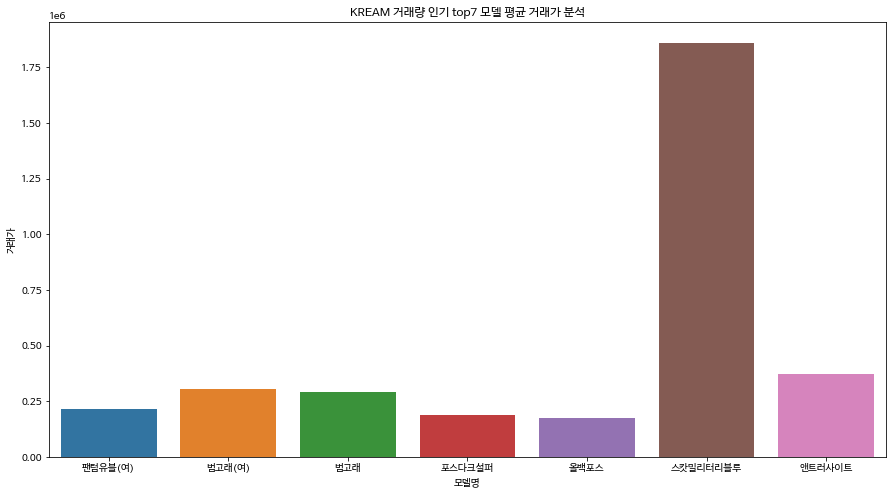

In [ ]:
plt.figure(figsize = (15,8))
plt.title('KREAM 거래량 인기 top7 모델 평균 거래가 분석')
sns.barplot(data=df_result, x="모델명", y="거래가")